# ML Tutorial
## Hand-written digit recognition problem (MNIST dataset)
## We'll train a couple of neural networks and see how good they are
## Firstly a standard neural network with one hidden layer and then a CNN with multiple layers

#### (Aftab Khan, 2017)

### 1 Load dataset and import all necessary libraries 

In [1]:
# load dataset and 
from keras.datasets import mnist #dataset
import matplotlib.pyplot as plt #plotting library
%matplotlib inline
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, classification_report
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


### 2 plot a few pictures to see what we're dealing with

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #this just splits the data into train and test sets
# plot 4 images as gray scale
plt.subplot(131)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(132)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(133)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### 3 Flatten the images

In [3]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

### 4 Normalize and output encode

In [4]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### 5 Baseline model - Shallow model

In [5]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_split=0.10, nb_epoch=3, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
7s - loss: 0.2978 - acc: 0.9146 - val_loss: 0.1226 - val_acc: 0.9672
Epoch 2/3
7s - loss: 0.1202 - acc: 0.9651 - val_loss: 0.0952 - val_acc: 0.9750
Epoch 3/3
7s - loss: 0.0769 - acc: 0.9774 - val_loss: 0.0805 - val_acc: 0.9770
Baseline Error: 2.67%


In [7]:
true_test=y_test.argmax(1)
pred_test=model.predict_classes(X_test)
print('\n\nConfusion Matrix\n')
print(confusion_matrix(true_test,pred_test))
print('========================================================')
print('Classification Report\n')
print(classification_report(true_test,pred_test))


 9920/10000 [============================>.] - ETA: 0s

Confusion Matrix

[[ 969    0    0    3    0    5    1    1    1    0]
 [   0 1122    2    1    0    1    4    2    3    0]
 [   5    0  993    6    4    1    2   11   10    0]
 [   0    0    0  983    0   15    0    6    3    3]
 [   0    0    4    1  967    0    1    2    1    6]
 [   2    0    0    2    0  878    7    0    2    1]
 [   7    2    0    1    4    7  934    2    1    0]
 [   0    3    5    4    0    0    0 1013    0    3]
 [   3    0    2   10    7   10    6    4  929    3]
 [   2    6    1   11   18    8    0   16    2  945]]
Classification Report

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.99      0.96      0.97      1032
          3       0.96      0.97      0.97      1010
          4       0.97      0.98      0.98       982
          5       0.95      0.98      0.97       892


# CNN

### Load some more stuff from keras

In [8]:
# Larger CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Input
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [9]:
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [10]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(28, 3, 3, activation='relu', input_shape=(1,28,28)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_split=0.1, nb_epoch=2, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 [==============================] - 139s - loss: 0.4649 - acc: 0.8531 - val_loss: 0.0889 - val_acc: 0.9757
Epoch 2/2
54000/54000 [==============================] - 138s - loss: 0.1178 - acc: 0.9636 - val_loss: 0.0638 - val_acc: 0.9838
CNN Error: 1.94%


In [12]:
true_test=y_test.argmax(1)
pred_test=model.predict_classes(X_test)
print('\n\nConfusion Matrix\n')
print(confusion_matrix(true_test,pred_test))
print('========================================================')
print('Classification Report\n')
print(classification_report(true_test,pred_test))

10000/10000 [==============================] - 16s    


Confusion Matrix

[[ 971    0    3    0    0    2    1    2    1    0]
 [   0 1127    2    1    0    1    3    1    0    0]
 [   2    2 1017    4    1    0    0    4    2    0]
 [   0    0    1  994    0   10    0    3    2    0]
 [   1    0    1    0  968    0    1    4    1    6]
 [   1    0    0    4    0  884    2    1    0    0]
 [   8    4    1    0    2   13  930    0    0    0]
 [   1    2    6    6    0    1    0 1009    1    2]
 [   5    0    3    7    1    7    0    4  944    3]
 [   4    4    1    9    5    8    0   12    4  962]]
Classification Report

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.99      0.98      1032
          3       0.97      0.98      0.98      1010
          4       0.99      0.99      0.99       982
          5       0.95      0.99      0.97       892

In [13]:
ix=true_test==pred_test
numpy.where(~ix)

(array([  62,  259,  290,  318,  320,  321,  420,  445,  495,  582,  583,
         591,  659,  684,  717,  726,  740,  844,  882,  898,  938,  947,
         965, 1014, 1039, 1072, 1107, 1112, 1156, 1181, 1182, 1191, 1226,
        1232, 1247, 1260, 1299, 1319, 1393, 1500, 1522, 1527, 1530, 1553,
        1554, 1621, 1626, 1681, 1686, 1709, 1717, 1754, 1878, 1899, 1901,
        1952, 1955, 1982, 2018, 2035, 2043, 2053, 2098, 2118, 2129, 2130,
        2135, 2182, 2189, 2280, 2293, 2380, 2387, 2454, 2462, 2488, 2597,
        2654, 2742, 2780, 2896, 2927, 2939, 2952, 2953, 2995, 3030, 3060,
        3073, 3206, 3218, 3240, 3330, 3422, 3503, 3520, 3550, 3597, 3716,
        3726, 3762, 3767, 3811, 3821, 3850, 3853, 3906, 3926, 4063, 4065,
        4075, 4078, 4176, 4224, 4238, 4248, 4265, 4294, 4306, 4344, 4500,
        4536, 4571, 4575, 4639, 4671, 4690, 4731, 4740, 4807, 4808, 4814,
        4823, 4838, 4874, 4880, 4956, 4966, 4978, 5268, 5331, 5600, 5642,
        5842, 5887, 5888, 5937, 5955, 

### Let's see where mistakes were made

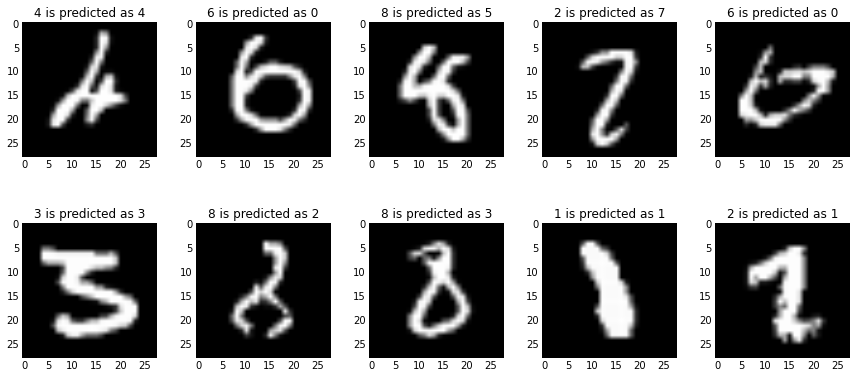

In [15]:
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5)
axs = axs.ravel()
toplot = [247,  259,  290,  321,  445,  449,  582,  591,  619,  659]
for i in range(10):
    axs[i].imshow(X_test[toplot[i],0,:,:], cmap=plt.get_cmap('gray'))
    axs[i].set_title('%s is predicted as %s' % (true_test[toplot[i]],pred_test[toplot[i]]))

# Exercise: Train the same CNN with Cifar10 dataset